## Load Data

In [35]:
# %%timeit
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from time import time
from os import getcwd
from os.path import join

path = join(getcwd().rstrip('src'), 'data/owid-covid-data.csv').replace('\\', '/')
data = pd.read_csv(path)

# 1. Use your first matplotlib tool to find out  any strange behaviour in OWID data.  There is no standard solution.  The purpose is to practice the tool and data.

# 2. Try to make two total_cases vs. date on one single graph with proper annotations on the graph.  I did not show this in the video.  You need to check my cheatsheet and google to get the solution.
=> location1 total_cases vs. date<br>
=> location2 total_cases vs. date

## Get Location Data

In [36]:
# Get location
locs = list(set(data.location)) # some elements are not locations
l1 = locs[0]
l2 = locs[1]
print(l1)
print(l2)

Palestine
Upper middle income


In [37]:
# Get location data
l1d = data.loc[data['location']==l1]
l2d = data.loc[data['location']==l2]
print(len(l1d))
print(len(l2d))
l1d.head(5)
# l2d.head(5)

934
977


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
151899,PSE,Asia,Palestine,2020-03-05,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74.05,0.708,NaN,NaN,NaN,NaN
151900,PSE,Asia,Palestine,2020-03-06,7.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74.05,0.708,NaN,NaN,NaN,NaN
151901,PSE,Asia,Palestine,2020-03-07,16.0,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74.05,0.708,NaN,NaN,NaN,NaN
151902,PSE,Asia,Palestine,2020-03-08,16.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74.05,0.708,NaN,NaN,NaN,NaN
151903,PSE,Asia,Palestine,2020-03-09,19.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74.05,0.708,NaN,NaN,NaN,NaN


In [38]:
# Drop unused columns
columns = list(data.columns)
# print(len(columns))
# print(columns)
columns.remove('total_cases')
columns.remove('date')
# print(len(columns))
# print(columns)
for x in columns:
    del l1d[x]
    del l2d[x]
l1d.head(5)
# l2d.head(5)

,date,total_cases
151899,2020-03-05,4.0
151900,2020-03-06,7.0
151901,2020-03-07,16.0
151902,2020-03-08,16.0
151903,2020-03-09,19.0


In [39]:
# Convert data into list for plotting
l1date = list(l1d.date)
l1date = [datetime.strptime(date, '%Y-%m-%d').date() for date in l1date]
l1case = list(l1d.total_cases)
l2date = list(l2d.date)
l2date = [datetime.strptime(date, '%Y-%m-%d').date() for date in l2date]
l2case = list(l2d.total_cases)

## Plot

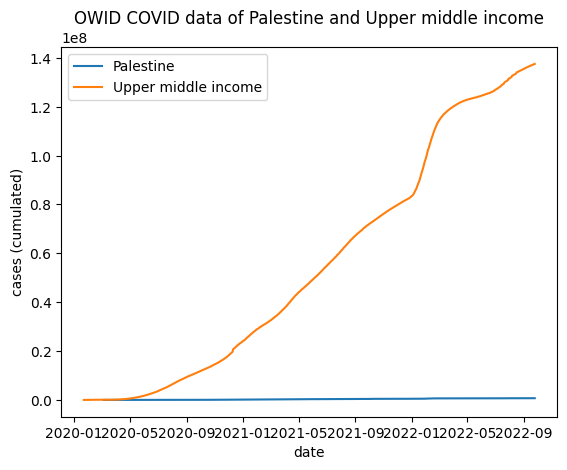

In [40]:
plt.title('OWID COVID data of {0} and {1}'.format(l1, l2))
plt.xlabel('date')
plt.ylabel('cases (cumulated)')
l1 = plt.plot(l1date, l1case, label=l1)
l2 = plt.plot(l2date, l2case, label=l2)
plt.legend()
# plt.show()